# 개요

- 출처
  - 원본 데이터 셋
    - [Paris Housing Price Prediction](https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction)
  - 경진 대회 데이터 셋
    - [Paris Housing Price](https://www.kaggle.com/competitions/playground-series-s3e6/overview) 
- 내용 : 교육 목적, 실습 및 필요한 지식 습득을 위한  파리의 가상 집값 데이터에서 생성된 데이터 셋
- 평가지표 : RMSE 
- 타임라인 : 2023.2.7 ~ 2023.2.20

## 데이터 준비 및 확인

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# 기본 패키지 도구 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 경로
path = '/content/drive/MyDrive/cloud_ai/모듈_프로젝트_2/ep.6/'

origin = pd.read_csv(path + 'ParisHousing.csv')
train = pd.read_csv(path + 'train.csv', index_col='id')
test = pd.read_csv(path + 'test.csv', index_col='id')
submission = pd.read_csv(path + 'sample_submission.csv', index_col='id')

In [54]:
origin.shape, train.shape, test.shape, submission.shape

((10000, 17), (22730, 17), (15154, 16), (15154, 1))

In [55]:
print(origin.columns)
print(train.columns)
print(test.columns)
print(submission.columns)
# price 변수를 제외하고 컬럼명 동일

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')
Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')
Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom'],
      dtype='object')
Index(['price'], dtype='object')


```
< 각 속성 확인 >
'id', : 고유 ID -> 확인 결과 id 컬럼은 인덱스정도 의미를 가진다 ( 컬럼 제거 가능 )
'squareMeters', : 방 면적 넓이 ( 연속형 )
'numberOfRooms', : 방 개수 ( 연속형 )   
'hasYard', : 마당 존재 여부  ( 이진형 : 0,1 )
'hasPool', : 수영장 존재 여부 ( 이진형 : 0,1 )
'floors', : 층 수 ( 이산형 )
'cityCode', : 건물 구별 고유 코드 (우편번호)
'cityPartRange', : 지역구로 추정 ( 범주형 : 1 ~ 10 )
'numPrevOwners', : 이전 집 소유자 거친 횟수 ( 이산형 )
'made', : 제작연도 ( 범주형 )
'isNewBuilt',: 리빌딩 여부 ( 이진형 : 0,1 )
'hasStormProtector', : 태풍 보호기 설치 여부 ( 이진형 : 0,1 )
'basement', : 지하실 면적 넓이 (연속형)
'attic', : 다락방 면적 넓이 (연속형)
'garage', : 주차장 크기 (연속형)
'hasStorageRoom', : 창고 여부 ( 이진형 : 0,1 )
'hasGuestRoom', : 게스트 룸 개수 ( 이산형 )
'price' : 종속변수(Target), 시세 예측값
```

In [56]:
train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
id,,,,,,,,,,,,,,,,,
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22730 entries, 0 to 22729
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       22730 non-null  int64  
 1   numberOfRooms      22730 non-null  int64  
 2   hasYard            22730 non-null  int64  
 3   hasPool            22730 non-null  int64  
 4   floors             22730 non-null  int64  
 5   cityCode           22730 non-null  int64  
 6   cityPartRange      22730 non-null  int64  
 7   numPrevOwners      22730 non-null  int64  
 8   made               22730 non-null  int64  
 9   isNewBuilt         22730 non-null  int64  
 10  hasStormProtector  22730 non-null  int64  
 11  basement           22730 non-null  int64  
 12  attic              22730 non-null  int64  
 13  garage             22730 non-null  int64  
 14  hasStorageRoom     22730 non-null  int64  
 15  hasGuestRoom       22730 non-null  int64  
 16  price              227

In [58]:
test

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
id,,,,,,,,,,,,,,,,
22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
37880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
37881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15154 entries, 22730 to 37883
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squareMeters       15154 non-null  int64
 1   numberOfRooms      15154 non-null  int64
 2   hasYard            15154 non-null  int64
 3   hasPool            15154 non-null  int64
 4   floors             15154 non-null  int64
 5   cityCode           15154 non-null  int64
 6   cityPartRange      15154 non-null  int64
 7   numPrevOwners      15154 non-null  int64
 8   made               15154 non-null  int64
 9   isNewBuilt         15154 non-null  int64
 10  hasStormProtector  15154 non-null  int64
 11  basement           15154 non-null  int64
 12  attic              15154 non-null  int64
 13  garage             15154 non-null  int64
 14  hasStorageRoom     15154 non-null  int64
 15  hasGuestRoom       15154 non-null  int64
dtypes: int64(16)
memory usage: 2.0 MB


In [60]:
origin

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [61]:
origin.info()
# 대부분 확인 시 모든 컬럼이 수치형으로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [62]:
submission

,price
id,
22730,4634456.897
22731,4634456.897
22732,4634456.897
22733,4634456.897
22734,4634456.897
...,...
37879,4634456.897
37880,4634456.897
37881,4634456.897


# 초기 파악

## 결측치 확인

In [63]:
# 참고 :  https://plotly.com/python-api-reference/

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def null_per(df):
    return (df.isnull().sum() / len(df)*100).sort_values(ascending=False)

plt.tight_layout() # 여백 확보

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Original Dataset", "Training Dataset","Test Dataset"))

null_per_origin = null_per(origin)
null_per_train = null_per(train)
null_per_test = null_per(test)

print(null_per_origin)
fig.add_trace(
    go.Bar(x=null_per_origin.index, y=null_per_origin.values),
    row=1, col=1
)

print(null_per_train)

fig.add_trace(
    go.Bar(x=null_per_train.index, y=null_per_train.values),
    row=1, col=2
)

print(null_per_test)

fig.add_trace(
    go.Bar(x=null_per_test.index, y=null_per_test.values),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

# 결측치 없음

squareMeters         0.0
isNewBuilt           0.0
hasGuestRoom         0.0
hasStorageRoom       0.0
garage               0.0
attic                0.0
basement             0.0
hasStormProtector    0.0
made                 0.0
numberOfRooms        0.0
numPrevOwners        0.0
cityPartRange        0.0
cityCode             0.0
floors               0.0
hasPool              0.0
hasYard              0.0
price                0.0
dtype: float64
squareMeters         0.0
isNewBuilt           0.0
hasGuestRoom         0.0
hasStorageRoom       0.0
garage               0.0
attic                0.0
basement             0.0
hasStormProtector    0.0
made                 0.0
numberOfRooms        0.0
numPrevOwners        0.0
cityPartRange        0.0
cityCode             0.0
floors               0.0
hasPool              0.0
hasYard              0.0
price                0.0
dtype: float64
squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors              

<Figure size 432x288 with 0 Axes>

## 고유값 확인

In [64]:
plt.tight_layout() # 여백 확보

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Unique values For Original Dataset", "For Training Dataset","For Test Dataset"))

temp_data= origin.nunique().sort_values()
print(temp_data)
fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

temp2_data= train.nunique().sort_values()
print(temp2_data)

fig.add_trace(
    go.Bar(x=temp2_data.index, y=temp2_data.values),
    row=1, col=2
)

temp3_data= test.nunique().sort_values()
print(temp3_data)

fig.add_trace(
    go.Bar(x=temp3_data.index, y=temp3_data.values),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

# 분포 확인 시 별 차이가 안 보인다
# hasYard, hasPool, hasStorageRoom, isNewBuilt, hasStormProtector는 이진형이다

hasYard                  2
hasPool                  2
hasStorageRoom           2
isNewBuilt               2
hasStormProtector        2
cityPartRange           10
numPrevOwners           10
hasGuestRoom            11
made                    32
numberOfRooms          100
floors                 100
garage                 901
attic                 6267
basement              6352
squareMeters          9483
cityCode              9509
price                10000
dtype: int64
hasYard                 2
hasPool                 2
hasStorageRoom          2
isNewBuilt              2
hasStormProtector       2
cityPartRange          10
numPrevOwners          10
hasGuestRoom           11
made                   33
numberOfRooms         100
floors                101
garage                896
basement             4903
attic                5167
squareMeters         7319
price                7421
cityCode             7810
dtype: int64
hasYard                 2
hasPool                 2
isNewBuilt           

<Figure size 432x288 with 0 Axes>

## 중복값 확인

In [65]:
train.shape, train.drop_duplicates().shape

((22730, 17), (22730, 17))

In [66]:
test.shape, test.drop_duplicates().shape

((15154, 16), (15154, 16))

In [67]:
origin.shape, origin.drop_duplicates().shape

((10000, 17), (10000, 17))

- 중복값 없음

## 데이터 요약

In [68]:
train.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


In [69]:
test.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000
mean,45729.407681,47.874951,0.483371,0.445361,46.401148,50185.582750,5.616933,5.602547,2006.225485,0.472219,0.463442,5299.415468,5057.506599,525.091065,0.463178,5.095618
std,29200.142520,28.164077,0.499740,0.497022,27.000547,31227.690126,2.727914,2.718316,8.156347,0.499244,0.498678,2980.156234,2928.004147,268.504745,0.498659,3.049174
min,69.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,8.000000,1.000000,8.000000,0.000000,0.000000
25%,19189.000000,25.000000,0.000000,0.000000,25.000000,23141.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,3114.000000,2567.000000,294.250000,0.000000,2.000000
50%,43802.000000,46.000000,0.000000,0.000000,44.000000,50693.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,5017.000000,501.000000,0.000000,5.000000
75%,70898.000000,75.000000,1.000000,1.000000,69.000000,76264.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7739.000000,7650.750000,757.000000,1.000000,8.000000
max,99999.000000,100.000000,1.000000,1.000000,100.000000,977950.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,89016.000000,38535.000000,1000.000000,1.000000,10.000000


In [70]:
origin.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


## 전체 요약 (함수화 처리)

In [71]:
def summary(df, train=train):
    print(f'data shape: {df.shape}')
    sum_df = pd.DataFrame(df.dtypes, columns=['type'])
    sum_df['null'] = df.isnull().sum().values * 100
    #sum_df['missing_per'] = df.isnull().sum().values / len(df)
    sum_df['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    sum_df['min'] = desc['min'].values
    sum_df['max'] = desc['max'].values
    sum_df['mean'] = desc['mean'].values
    sum_df['first value'] = df.iloc[0].values
    sum_df['second value'] = df.iloc[1].values
    sum_df['third value'] = df.iloc[2].values
    
    return sum_df
summary_df = summary(train)
summary_df

# squareMeters : 6071330.0, floors : 6000.0, made : 10000.0 등 이상치를 확인할 수 있었다 
# => 나중에 제거 등 처리할 방법이 필요함.

data shape: (22730, 17)


,type,null,unique,min,max,mean,first value,second value,third value
squareMeters,int64,0,7319,89.0,6071330.0,4.658622e+04,34291.0,95145.0,92661.0
numberOfRooms,int64,0,100,1.0,100.0,4.824109e+01,24.0,60.0,45.0
hasYard,int64,0,2,0.0,1.0,4.758909e-01,1.0,0.0,1.0
hasPool,int64,0,2,0.0,1.0,4.527497e-01,0.0,1.0,1.0
floors,int64,0,101,1.0,6000.0,4.730598e+01,47.0,60.0,62.0
cityCode,int64,0,7810,3.0,491100.0,5.001380e+04,35693.0,34773.0,45457.0
cityPartRange,int64,0,10,1.0,10.0,5.585042e+00,2.0,1.0,4.0
numPrevOwners,int64,0,10,1.0,10.0,5.620766e+00,1.0,4.0,8.0
made,int64,0,33,1990.0,10000.0,2.008005e+03,2000.0,2000.0,2020.0
isNewBuilt,int64,0,2,0.0,1.0,4.679718e-01,0.0,0.0,1.0


In [72]:
summary_df2 = summary(origin)
summary_df2

data shape: (10000, 17)


,type,null,unique,min,max,mean,first value,second value,third value
squareMeters,int64,0,9483,89.0,99999.0,4.987013e+04,75523.0,80771.0,55712.0
numberOfRooms,int64,0,100,1.0,100.0,5.035840e+01,3.0,39.0,58.0
hasYard,int64,0,2,0.0,1.0,5.087000e-01,0.0,1.0,0.0
hasPool,int64,0,2,0.0,1.0,4.968000e-01,1.0,1.0,1.0
floors,int64,0,100,1.0,100.0,5.027630e+01,63.0,98.0,19.0
cityCode,int64,0,9509,3.0,99953.0,5.022549e+04,9373.0,39381.0,34457.0
cityPartRange,int64,0,10,1.0,10.0,5.510100e+00,3.0,8.0,6.0
numPrevOwners,int64,0,10,1.0,10.0,5.521700e+00,8.0,6.0,8.0
made,int64,0,32,1990.0,2021.0,2.005488e+03,2005.0,2015.0,2021.0
isNewBuilt,int64,0,2,0.0,1.0,4.991000e-01,0.0,1.0,0.0


- 오리지널 데이터와 비교 시, 차이가 나는 부분이 보인다.
  - squareMeters, floors, cityCode, made, basement, attic, garage


# EDA

- EDA 진행중 수행하는 시각화는 평면적인 데이터에서 주요 특성을 드러내는 효과적인 방법

- 데이터 종류 (복습)
 
|범주형(Categorical)|--|예시|특징|
|--|--|--|--|
|명목형(Nominal)|--|성별, 음식종류|순위가 없다.서열없다|
|순서형(Ordinal)|--|학점, 순위, 평점|순위를 매길수 있다. |
* 사칙연산이 가능한 데이터

|수치형(Numerical)|--|예시|특징|
|--|--|--|--|
|이산형(Discrete)|--|메뉴개수, 책개수|정수로 떨어지는 셀 수 있는 데이터, 소수점없음|
|연속형(Continous)|--|키,몸무게,집값|값이끊기지 않고 연속된 데이터, 소수점가능|
* 범주로 나눠지는 데이터

- [기초 통계 이해](https://m.blog.naver.com/dairum_enc/221409597367)
- [범주형,수치형,이상형,연속형,명목형,순서형 정리 - Unique Life](https://horae.tistory.com/entry/%EB%B2%94%EC%A3%BC%ED%98%95%EC%88%98%EC%B9%98%ED%98%95%EC%9D%B4%EC%83%81%ED%98%95%EC%97%B0%EC%86%8D%ED%98%95%EB%AA%85%EB%AA%A9%ED%98%95%EC%88%9C%EC%84%9C%ED%98%95-%EC%A0%95%EB%A6%AC)

In [73]:
# 앞 선 데이터셋 (기준) 요약을 통해서 데이터 유형을 분류해보았다.

# 범주형
features_cat = ['hasYard', 'hasPool','isNewBuilt','hasStormProtector', 'hasStorageRoom','hasGuestRoom']

# 수치형
features_num = ['squareMeters', 'numberOfRooms', 'floors', 'cityCode','cityPartRange', 'numPrevOwners', 'made','basement', 'attic', 'garage']

# 이진형
features_bin = ['hasYard', 'hasPool','isNewBuilt','hasStormProtector', 'hasStorageRoom']

# 연속형
features_cont=['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'basement', 'attic', 'garage' ]

# 이산형 
features_dis=['hasYard', 'hasPool' ,'hasStormProtector','hasStorageRoom','hasGuestRoom', 'isNewBuilt']

# 종속변수
target = 'price'

## Target 분포 확인

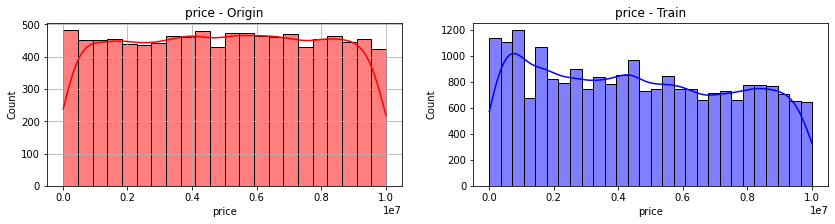

In [74]:
plt.figure(figsize=(14,3))
ax1 = plt.subplot(1,2,1)
sns.histplot(x=origin[target], color='r', kde=True)
plt.title(target + ' - Origin')
plt.grid()
ax2 = plt.subplot(1,2,2)
sns.histplot(x=train[target], color='b', kde=True)
plt.title(target + ' - Train')
plt.show()

# 가격대의 분포가 다양하다

## Histogram

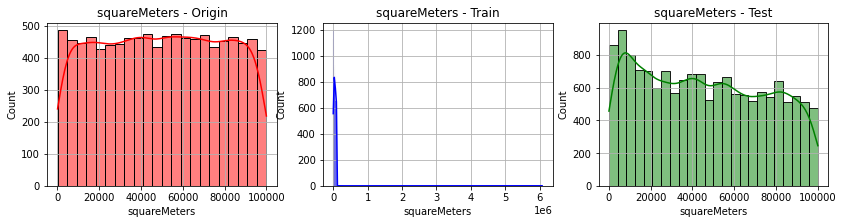

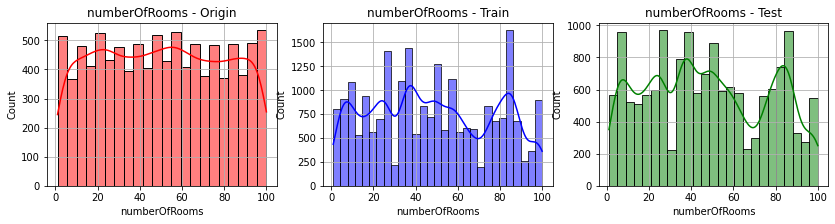

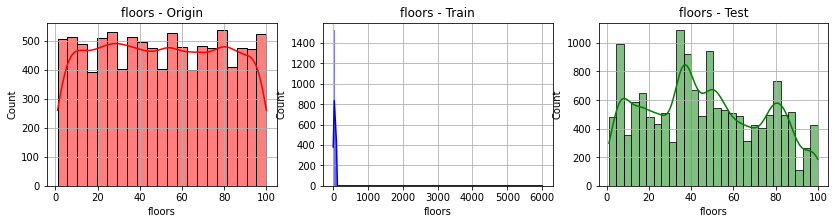

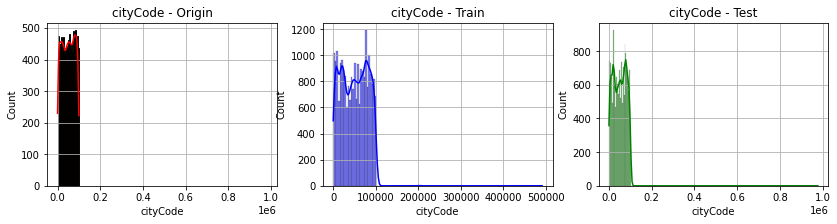

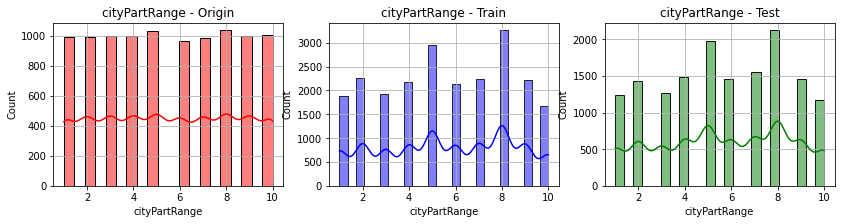

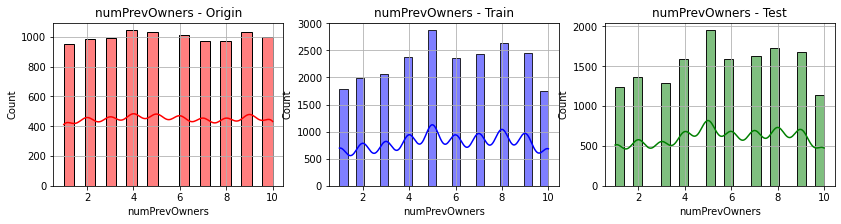

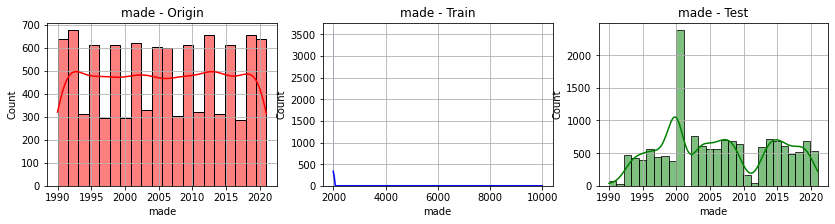

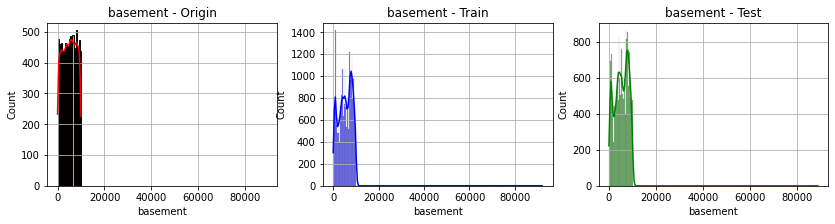

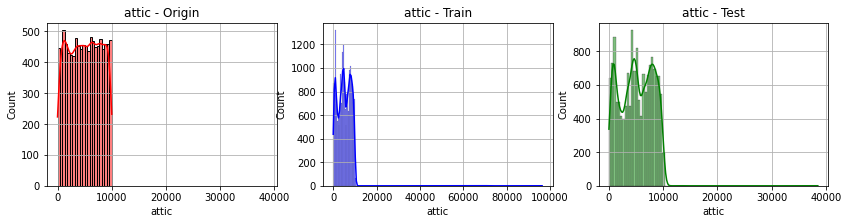

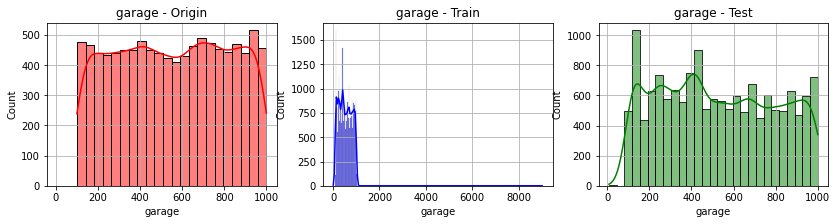

In [75]:
for f in features_cont:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.histplot(x=origin[f], color='r', kde=True)
  plt.title(f + ' - Origin')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.histplot(x=train[f], color='b', kde=True)
  plt.title(f + ' - Train')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.histplot(x=test[f],color='g', kde=True)
  plt.title(f + ' - Test')
  plt.grid()
  plt.show()

# 확인 시 train,test에서 이상치로 보여 한 곳으로 밀집되는 경우가 있다. -> 비대칭(skewed) 데이터를 처리하는 3가지 방법 / Skewed Data https://dining-developer.tistory.com/18

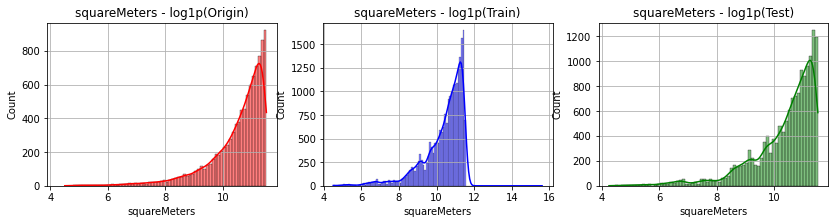

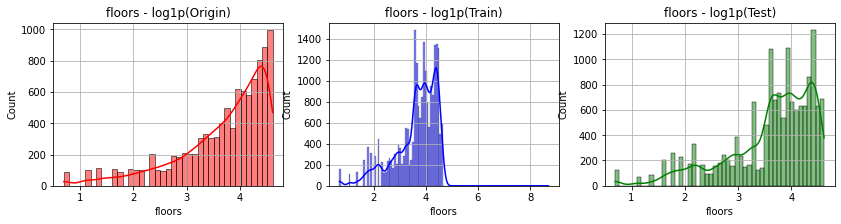

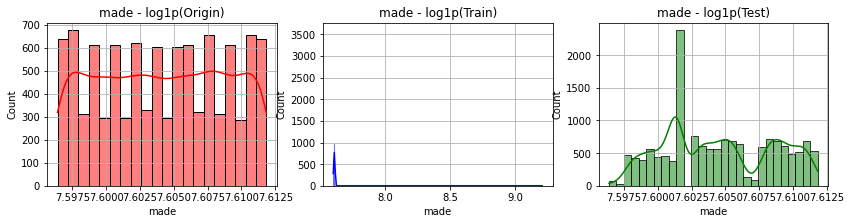

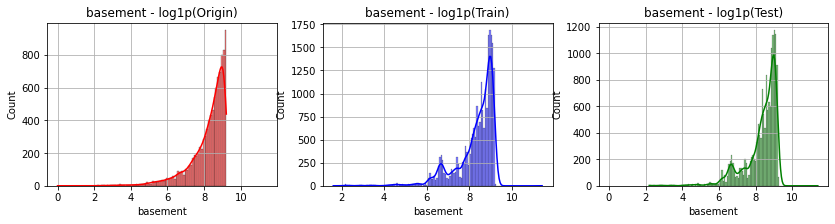

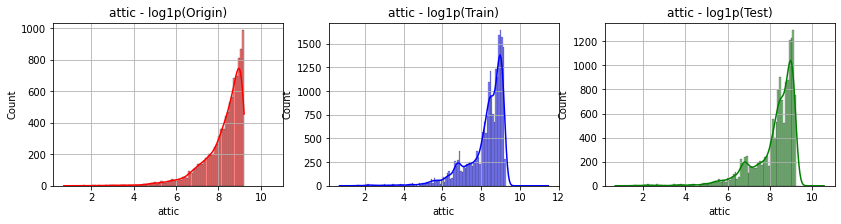

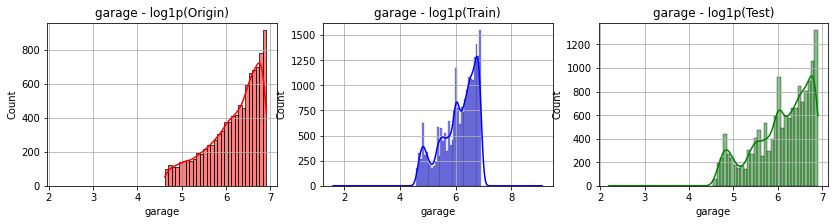

In [76]:
# 위에서 보인 비대칭 분포를 log 처리하여 분포를 확인해보자[https://steadiness-193.tistory.com/224] > 분포에 별 차이가 없다.
features_cont_log = ['squareMeters', 'floors','made', 'basement', 'attic', 'garage']

for f in features_cont_log:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.histplot(x=np.log1p(origin[f]), color='r', kde=True)
  plt.title(f + ' - log1p(Origin)')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.histplot(x=np.log1p(train[f]), color='b', kde=True)
  plt.title(f + ' - log1p(Train)')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.histplot(x=np.log1p(test[f]),color='g', kde=True)
  plt.title(f + ' - log1p(Test)')
  plt.grid()
  plt.show()

## Boxplot

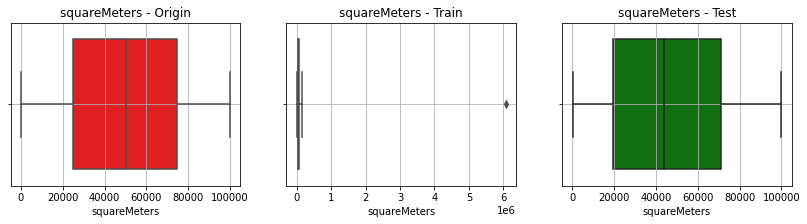

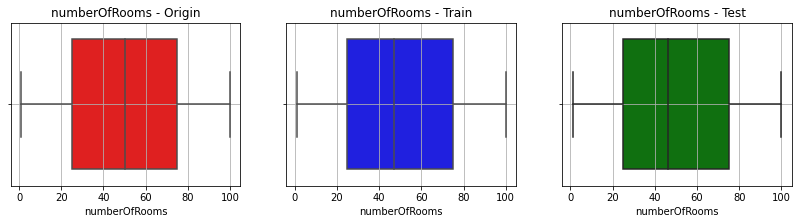

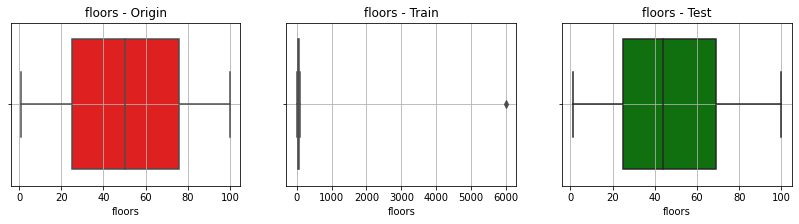

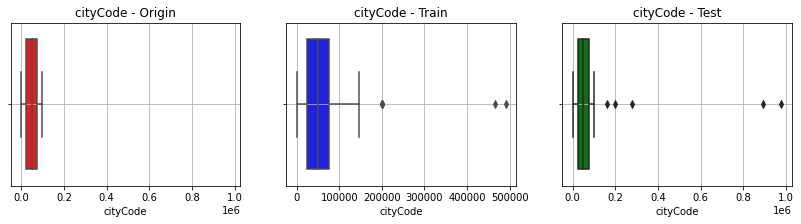

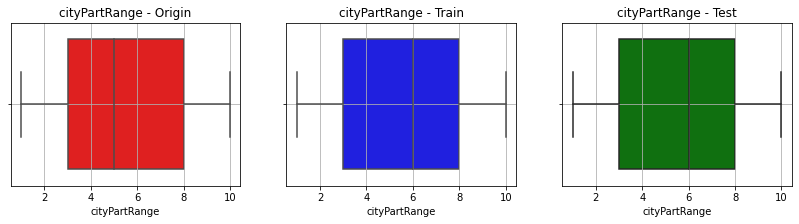

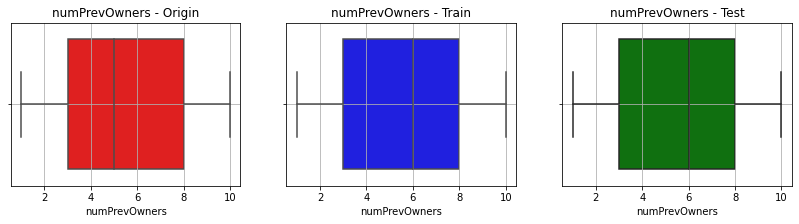

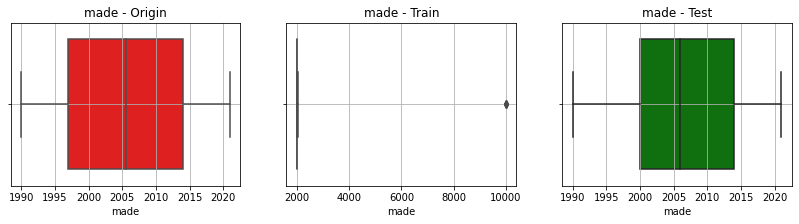

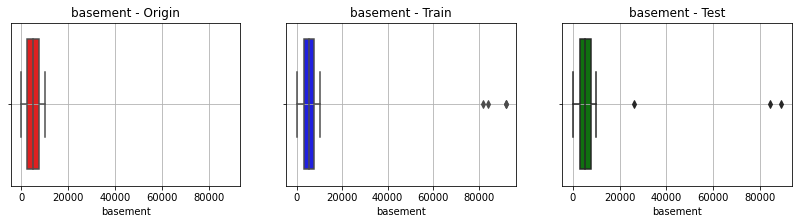

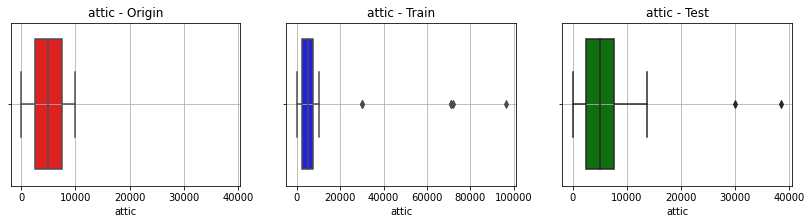

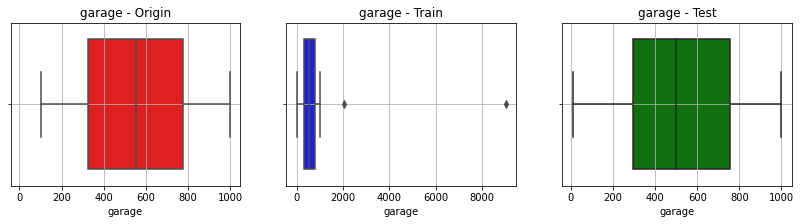

In [77]:
for f in features_cont:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.boxplot(x=origin[f], color='r')
  plt.title(f + ' - Origin')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.boxplot(x=train[f], color='b')
  plt.title(f + ' - Train')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.boxplot(x=test[f],color='g')
  plt.title(f + ' - Test')
  plt.grid()
  plt.show()

# 원본에는 이상치 X, train/test이상치가 존재하는 것이 확인 -> squareMeter, floors, citycode, made, basement, attic, garage
# 다만 test 데이터 셋에서는 citycode, basement, attic 만 해당 됨 

## Countplot 

<ipython-input-78-af8c264576ab>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-af8c264576ab>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-af8c264576ab>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



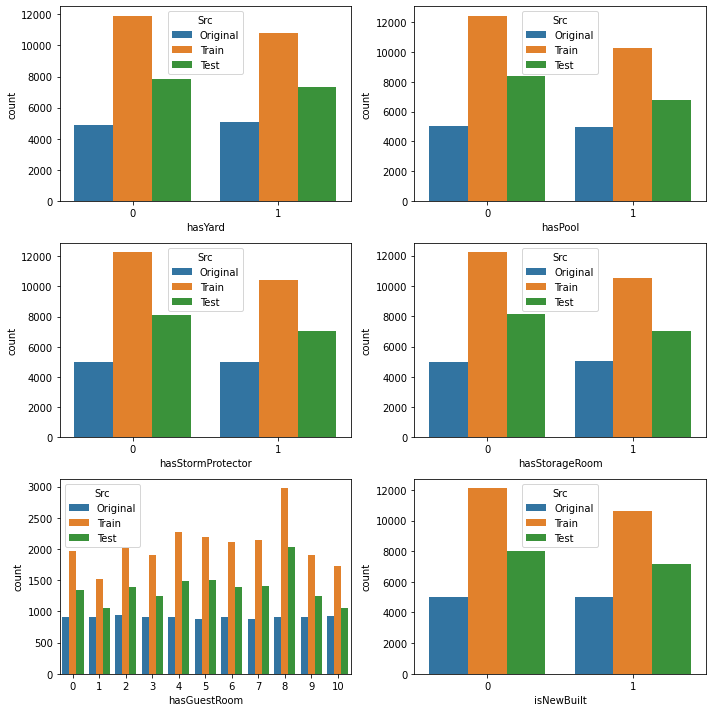

In [78]:
import math

features_dis=['hasYard', 'hasPool' ,'hasStormProtector','hasStorageRoom','hasGuestRoom', 'isNewBuilt']

t1 = origin[features_dis]

# hue 값 설정 하기 위해 src이라는 새로운 열 생성 
t1['Src'] = 'Original'

t2 = train[features_dis]
t2['Src'] = 'Train'

t3 = test[features_dis]
t3['Src'] = 'Test'

t4 = pd.concat([t1,t2,t3]).reset_index(drop=True)

y=2
# 파이썬 올림, 내림 함수:  https://ooyoung.tistory.com/99
x = math.ceil((len(features_dis)-1)/y)

# nrows = x, ncols = y
plt.subplots(x, y, figsize=(10,10))

for i in range(1,len(features_dis)+1) :

    # 하위 서브 플롯
    plt.subplot(x, y, i)
    sns.countplot(data=t4, x=features_dis[i-1], hue='Src');

plt.tight_layout()    
plt.show()

# 모든 열의 비슷한 비율이 관찰되며 train/test 데이터 셋이 

# 데이터 관계 시각화

## Heatmap

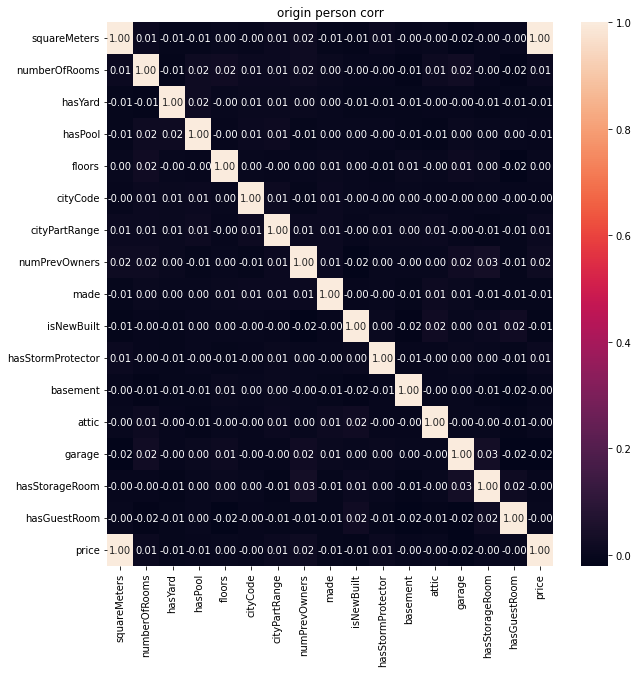

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(origin.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("origin person corr")
plt.show()

# squareMeters를 제외하고 다 약한 상관관계를 가지고 있다.

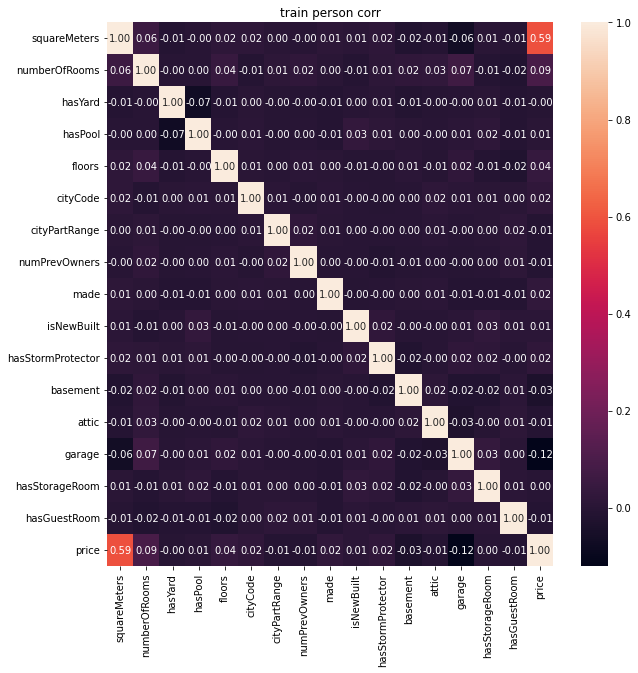

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("train person corr")
plt.show()

# squareMeters를 제외하고 다 약한 상관관계를 가지고 있다.

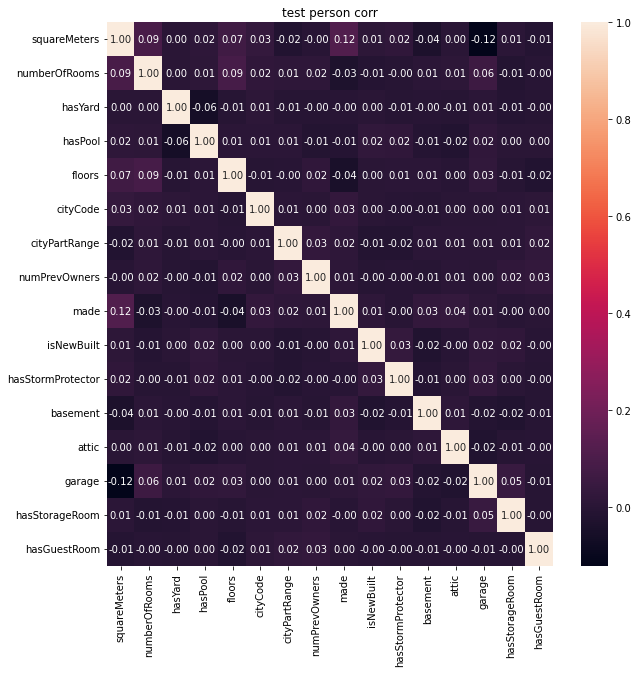

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("test person corr")
plt.show()

# 상관관계가 보이지 않음

## Regplot

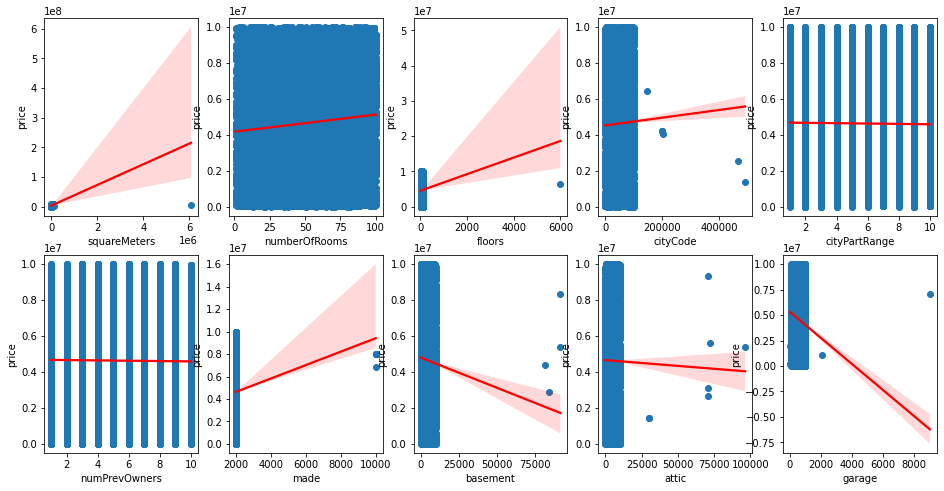

In [82]:
fig, axes = plt.subplots(figsize=(16,8), ncols=5, nrows=2)

for i, feature in enumerate(features_cont):
    row = int(i/5) 
    col = int(i%5)
    sns.regplot(x=feature,y='price',data=train, ax=axes[row][col], line_kws={'color':'red'}, scatter_kws={'alpha':1.0})

plt.show()

# 연속형 확인 시 squareMeters, floor, made가 어느정도 선형이 보임

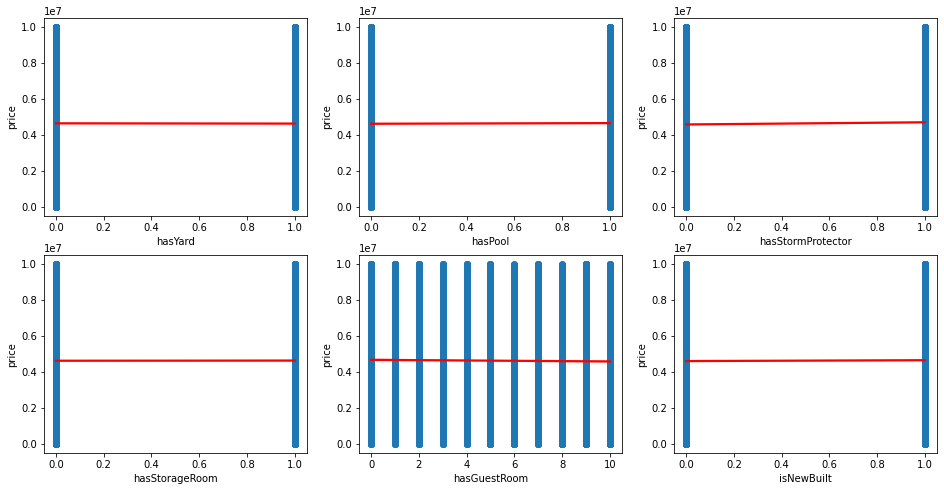

In [83]:
fig, axes = plt.subplots(figsize=(16,8), ncols=3, nrows=2)

for i, feature in enumerate(features_dis):
    row = int(i/3) 
    col = int(i%3)
    sns.regplot(x=feature, y='price',data=train, ax=axes[row][col], line_kws={'color':'red'}, scatter_kws={'alpha':1.0})

plt.show()

# EDA 결과

- origin/train/test 데이터 셋에서는 결측치는 X 
- Boxplot 확인 시, train/test 데이터 셋에서 이상치는 다음과 같다 : squareMeters, floors, cityCode, made, basement, attic, garage
- Heatmap 확인 시 squaremeter 제외하고 다 약한 상관관계를 가지고 있다.
- Regplot 확인 시, basement, attic, garage는 price을 예측 시 도움이 되지 않는다


# 베이스라인 모델 구축



In [84]:
# 기본 패키지 도구 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 경로
path = '/content/drive/MyDrive/cloud_ai/모듈_프로젝트_2/ep.6/'

origin = pd.read_csv(path + 'ParisHousing.csv')
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

origin.shape, train.shape, test.shape, submission.shape

((10000, 17), (22730, 18), (15154, 17), (15154, 2))

# 피처 엔지니어링

In [85]:
# ID :  인덱스로 대체 가능 -> 제거
train.drop(columns=['id'],inplace=True)
test.drop(columns=['id'],inplace=True)

print(train.shape, test.shape)
train

(22730, 17) (15154, 16)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


## 이상치 탐지 ( IQR )

- 앞 선 boxplot을 통해서 이상치를 확인 할 수 있었다. -> 이상치가 있는 특성만 따로 뽑아서 확인
  -  함수화 처리 참고 :  [IQR을 이용하여 이상치를 탐색하고 처리하기](https://hong-yp-ml-records.tistory.com/15)

In [86]:
# 이상치 탐지 ( 전체 부분 )
from collections import Counter

features_out = ['squareMeters', 'floors', 'cityCode', 'made', 'basement', 'attic', 'garage']

def detect_outliers(df,features):
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    print(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items())
    
        
    return multiple_outliers

In [87]:
Outliers_to_drop = detect_outliers(train, features_out)
print(f'이상치 총 개수 {len(Outliers_to_drop)} 개')
train.loc[Outliers_to_drop] 
# iqr 방식으로 모든 이상치를 확인 

Counter({15334: 1, 5659: 1, 299: 1, 1326: 1, 2425: 1, 10987: 1, 20735: 1, 22631: 1, 2113: 1, 3608: 1, 19124: 1, 19748: 1, 21400: 1, 2107: 1, 3995: 1, 15068: 1, 18926: 1, 3828: 1, 4909: 1, 12858: 1, 13633: 1, 13642: 1, 17168: 1, 19994: 1, 14878: 1, 17629: 1})
이상치 총 개수 26 개


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9
5659,65029,50,0,1,6000,79146,4,5,2012,0,1,5123,230,668,0,4,6507042.1
299,40200,44,1,1,19,201035,5,4,2006,0,0,2538,7437,985,0,0,4028239.6
1326,13591,6,0,1,20,491100,5,9,2000,0,1,8747,5840,675,0,8,1367021.0
2425,25594,35,1,0,50,465360,6,8,1997,0,0,4774,8779,612,1,4,2564288.7
10987,42211,78,0,1,52,200812,7,10,2008,0,1,7645,9349,902,0,0,4230896.8
20735,42211,85,1,1,34,200801,8,7,2008,0,0,8434,9238,798,1,9,4230896.8
22631,42211,84,0,0,56,200801,7,3,2008,0,1,9845,8224,985,1,10,4230896.8
2113,68038,41,0,0,54,87120,3,6,10000,1,1,6537,6304,366,0,0,6807415.1
3608,80062,81,1,0,35,67157,9,4,10000,0,1,732,6475,758,0,4,8007951.1


In [88]:
## 이상치 전부 제거 (보류)
# train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [89]:
Outliers_to_drop = detect_outliers(test, features_out)
print(f'이상치 총 개수 {len(Outliers_to_drop)} 개')
test.loc[Outliers_to_drop] 

# 테스트 셋 기준, iqr 방식으로 이상치는 cityCode, basement, attic에 있음 -> 제거 X 

Counter({4987: 1, 6503: 1, 8215: 1, 10525: 1, 13111: 1, 696: 1, 1789: 1, 11191: 1, 2838: 1, 9148: 1})
이상치 총 개수 10 개


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
4987,42211,51,0,1,13,200801,2,8,2008,1,0,874,9238,796,0,10
6503,95894,34,1,1,7,889795,6,9,2005,0,1,7381,75,582,0,6
8215,68824,8,0,1,34,977950,4,5,1990,0,0,6044,2097,665,1,7
10525,18368,22,0,1,71,279019,8,10,2000,0,1,6133,6642,289,1,4
13111,33156,35,1,0,77,162019,5,5,1994,0,0,1285,5075,814,1,6
696,28600,84,1,0,85,598,5,9,2017,1,1,26132,4831,874,1,7
1789,44838,49,0,1,85,19691,5,9,2009,0,0,84333,8252,865,0,2
11191,43906,58,0,0,79,98779,6,1,2013,1,1,89016,4409,675,0,5
2838,47982,81,1,1,38,52650,1,7,1994,1,1,9727,38535,327,1,10
9148,14588,39,0,1,2,35318,5,7,2003,0,0,3333,30000,357,1,4


In [90]:
# 이상치 탐지 함수 ( 특징 하나 씩 보도록 변경 )

def detect_outlier(df,feature):
  
  Q1 = np.percentile(df[feature], 25)
  Q3 = np.percentile(df[feature], 75)
  IQR = Q3 - Q1
        
  outlier_step = 1.5 * IQR
  
  return df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)]

#### squareMeters ( 방 면적 넓이 )
  - Boxplot 확인 시 1e6 = 1000000
  - [면적순 나라 목록](https://ko.wikipedia.org/wiki/%EB%A9%B4%EC%A0%81%EC%88%9C_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D) 기준으로 보면 나라의 크기를 나타냄 -> <u>이상치 확실</u>
    - 6071330m^2 : 1836577.33 평 [ 평수 계산기 사용 시 ]


In [91]:
detect_outlier(train,'squareMeters')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9


In [92]:
train.squareMeters.sort_values(ascending=False)
# 확인 시 2개가 이상치로 되어 있다

15334    6071330
4741      146181
17330      99985
14864      99985
5261       99985
          ...   
2356          89
14879         89
12130         89
14314         89
13338         89
Name: squareMeters, Length: 22730, dtype: int64

In [93]:
train2 = train

In [94]:
train2.drop([15334,4741], axis=0, inplace=True)
train2

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


In [95]:
train2.squareMeters.sort_values(ascending=False)

5261     99985
13686    99985
14864    99985
17330    99985
648      99952
         ...  
2356        89
21718       89
14314       89
5763        89
13338       89
Name: squareMeters, Length: 22728, dtype: int64

In [96]:
train2.mean()

squareMeters         4.631676e+04
numberOfRooms        4.824085e+01
hasYard              4.759328e-01
hasPool              4.527895e-01
floors               4.730605e+01
cityCode             5.001391e+04
cityPartRange        5.584829e+00
numPrevOwners        5.620600e+00
made                 2.008005e+03
isNewBuilt           4.679690e-01
hasStormProtector    4.600053e-01
basement             5.283570e+03
attic                5.067946e+03
garage               5.304339e+02
hasStorageRoom       4.616772e-01
hasGuestRoom         5.152851e+00
price                4.634533e+06
dtype: float64

In [97]:
# 이상치 제거 보다는 평균값으로 대체 (이상치 2개 값을 제외한 평균값)
train.loc[train.index.isin([15334, 4741]), 'squareMeters'] = 4.631676e+04

In [98]:
train.squareMeters.sort_values(ascending=False)

5261     99985.0
13686    99985.0
14864    99985.0
17330    99985.0
648      99952.0
          ...   
2356        89.0
21718       89.0
14314       89.0
5763        89.0
13338       89.0
Name: squareMeters, Length: 22728, dtype: float64

#### floors ( 층 수 )
  - [런던·파리·뉴욕… 세계도 건물 높이 규제](https://www.seouland.com/arti/society/society_general/1609.html) 확인 시 최대 높이 기준 : 1973년 200m가 넘는 몽파르나스 타워(59층) ->  59층 이상도 이상치 인가? -> 확인 필요
  - Boxplot 확인 시 현재 존재하는 건물 들 중 6000층은 말이 안됨 -> <u>이상치 확실</u> 

In [100]:
# train[train.floors > 59]
# 데이터가 제거 시 데이터가 너무 적어짐 ->  방식 X

In [101]:
detect_outlier(train,'floors')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
5659,65029.0,50,0,1,6000,79146,4,5,2012,0,1,5123,230,668,0,4,6507042.1


In [102]:
train.loc[train.index.isin([5659]), 'floors'] = 100

In [103]:
train.floors.sort_values(ascending=False)

606      100
11948    100
15599    100
13397    100
6059     100
        ... 
15168      1
19047      1
4675       1
5794       1
17668      1
Name: floors, Length: 22728, dtype: int64

### CityCode ( 도시 코드 )

- 임의로 만들어진 특성이므로 의미가 없다고 함 -> [cityCode is Fake!](https://www.kaggle.com/competitions/playground-series-s3e6/discussion/384676) -> 열 자체 삭제 권장

In [104]:
detect_outlier(train,'cityCode')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
299,40200.0,44,1,1,19,201035,5,4,2006,0,0,2538,7437,985,0,0,4028239.6
1326,13591.0,6,0,1,20,491100,5,9,2000,0,1,8747,5840,675,0,8,1367021.0
2425,25594.0,35,1,0,50,465360,6,8,1997,0,0,4774,8779,612,1,4,2564288.7
10987,42211.0,78,0,1,52,200812,7,10,2008,0,1,7645,9349,902,0,0,4230896.8
20735,42211.0,85,1,1,34,200801,8,7,2008,0,0,8434,9238,798,1,9,4230896.8
22631,42211.0,84,0,0,56,200801,7,3,2008,0,1,9845,8224,985,1,10,4230896.8


### made (제작년도) 

- 2021년도 기준으로 초과 시 미래 시간 (존재하지 않음) -> <u>이상치 확실

In [105]:
detect_outlier(train,'made')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2113,68038.0,41,0,0,54,87120,3,6,10000,1,1,6537,6304,366,0,0,6807415.1
3608,80062.0,81,1,0,35,67157,9,4,10000,0,1,732,6475,758,0,4,8007951.1
19124,80062.0,52,0,0,84,67099,9,4,10000,0,0,7677,5017,148,0,4,8007951.1
19748,80062.0,58,0,1,86,40408,7,8,10000,0,0,7059,7307,287,0,2,8007951.1
21400,80062.0,78,0,0,84,59457,4,7,10000,1,0,6382,9507,298,1,4,8007951.1


In [106]:
train.loc[train.index.isin([2113,3608,19124,19748,21400]), 'made'] = 2021

In [107]:
train.made.sort_values(ascending=False)

21935    2021
9209     2021
12797    2021
4470     2021
1271     2021
         ... 
15293    1990
10624    1990
9637     1990
13923    1990
18988    1990
Name: made, Length: 22728, dtype: int64

### basement( 지하실 면적 넓이 )

In [108]:
detect_outlier(train,'basement')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2107,28956.0,100,0,1,35,39767,6,9,2000,0,1,84333,8777,655,0,1,2898953.1
3995,43758.0,14,0,0,93,62528,3,9,2008,0,0,81851,9179,243,0,2,4385098.8
15068,83358.0,35,1,0,83,22449,9,2,2015,0,0,91992,299,897,0,0,8341911.5
18926,53671.0,55,0,1,85,6249,7,6,2017,0,1,91978,959,515,1,2,5378022.7


In [109]:
detect_outlier(test,'basement')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
696,28600,84,1,0,85,598,5,9,2017,1,1,26132,4831,874,1,7
1789,44838,49,0,1,85,19691,5,9,2009,0,0,84333,8252,865,0,2
11191,43906,58,0,0,79,98779,6,1,2013,1,1,89016,4409,675,0,5


In [110]:
train.basement.sort_values(ascending=False)[:10]

15068    91992
18926    91978
2107     84333
3995     81851
18396    10000
12829    10000
18640    10000
352      10000
174      10000
19389    10000
Name: basement, dtype: int64

In [111]:
test.basement.sort_values(ascending=False)[:10]

11191    89016
1789     84333
696      26132
5048     10000
2073     10000
6748     10000
4892     10000
2733     10000
10189    10000
7414     10000
Name: basement, dtype: int64

In [112]:
train.loc[train.index.isin([2107,3995,15068,18926]), 'basement'] = 10000
test.loc[test.index.isin([696,1789,11191]), 'basement'] = 10000

In [113]:
train.basement.sort_values(ascending=False)[:10]

18396    10000
4362     10000
3995     10000
18640    10000
18926    10000
352      10000
174      10000
19389    10000
816      10000
336      10000
Name: basement, dtype: int64

In [115]:
test.basement.sort_values(ascending=False)[:10]

5048     10000
696      10000
6748     10000
4892     10000
2733     10000
10189    10000
7414     10000
2073     10000
6723     10000
10285    10000
Name: basement, dtype: int64

### attic ( 다락방 면적 넓이 )

In [116]:
detect_outlier(train,'attic')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
3828,31357.0,80,0,1,35,56962,9,4,2017,1,0,1284,71001,212,0,5,3141062.7
4909,26484.0,33,0,1,37,83634,5,3,1997,1,1,774,71001,663,0,1,2654798.7
12858,93278.0,41,1,1,56,46600,9,8,2015,0,1,4145,71024,473,0,3,9339538.5
13633,53708.0,81,0,0,84,12841,7,6,2006,1,1,759,96381,860,1,8,5378041.6
13642,14588.0,36,0,0,16,3578,5,2,2003,0,1,5361,30000,357,0,4,1459601.3
17168,56147.0,100,0,0,35,79570,7,7,2016,1,1,9631,71965,973,0,6,5621340.6
19994,14588.0,43,1,0,23,38270,10,7,2003,0,1,9789,30000,177,1,4,1459601.3


In [117]:
detect_outlier(test,'attic')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
2838,47982,81,1,1,38,52650,1,7,1994,1,1,9727,38535,327,1,10
9148,14588,39,0,1,2,35318,5,7,2003,0,0,3333,30000,357,1,4


In [118]:
train.attic.sort_values(ascending=False)[:10]

13633    96381
17168    71965
12858    71024
3828     71001
4909     71001
13642    30000
19994    30000
14162    10000
9115     10000
13347    10000
Name: attic, dtype: int64

In [119]:
test.attic.sort_values(ascending=False)[:10]

2838     38535
9148     30000
14769    13779
4892     10000
11506    10000
81       10000
10517     9999
11438     9985
6801      9985
13885     9985
Name: attic, dtype: int64

In [120]:
train.loc[train.index.isin([3828,4909,12858,13633,13642,17168,19994]), 'attic'] = 10000
test.loc[test.index.isin([2838,9148,14769]), 'attic'] = 10000

In [121]:
train.attic.sort_values(ascending=False)[:10]

13642    10000
13633    10000
9115     10000
4909     10000
13347    10000
17168    10000
833      10000
14162    10000
5991     10000
9864     10000
Name: attic, dtype: int64

In [122]:
test.attic.sort_values(ascending=False)[:10]

4892     10000
11506    10000
2838     10000
81       10000
14769    10000
9148     10000
10517     9999
11438     9985
6801      9985
13885     9985
Name: attic, dtype: int64

### garage ( 주차 공간 크기 )

In [123]:
detect_outlier(train,'garage')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
14878,10380.0,44,0,0,41,40504,1,4,2020,0,0,8876,803,2048,0,2,1049793.1
17629,70409.0,86,0,0,90,85476,5,6,2000,1,0,2522,9057,9017,1,3,7042999.2


In [124]:
train.garage.sort_values(ascending=False)[:10]

17629    9017
14878    2048
13018    1000
10834    1000
17717    1000
14120    1000
21585    1000
19254    1000
5891     1000
336      1000
Name: garage, dtype: int64

In [125]:
train.loc[train.index.isin([14878,17629]), 'garage'] = 1000

In [126]:
train.garage.sort_values(ascending=False)[:10]

13018    1000
10834    1000
5809     1000
17717    1000
14120    1000
21585    1000
19254    1000
5891     1000
336      1000
17535    1000
Name: garage, dtype: int64

## 데이터 합치기

In [127]:
all_data = pd.concat([origin,train,test], ignore_index=True)
all_data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523.0,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771.0,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712.0,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316.0,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429.0,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47877,86184.0,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1,NaN
47878,45885.0,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0,NaN
47879,73554.0,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10,NaN
47880,77604.0,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2,NaN


In [128]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47882 entries, 0 to 47881
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       47882 non-null  float64
 1   numberOfRooms      47882 non-null  int64  
 2   hasYard            47882 non-null  int64  
 3   hasPool            47882 non-null  int64  
 4   floors             47882 non-null  int64  
 5   cityCode           47882 non-null  int64  
 6   cityPartRange      47882 non-null  int64  
 7   numPrevOwners      47882 non-null  int64  
 8   made               47882 non-null  int64  
 9   isNewBuilt         47882 non-null  int64  
 10  hasStormProtector  47882 non-null  int64  
 11  basement           47882 non-null  int64  
 12  attic              47882 non-null  int64  
 13  garage             47882 non-null  int64  
 14  hasStorageRoom     47882 non-null  int64  
 15  hasGuestRoom       47882 non-null  int64  
 16  price              327

## 파생 피처 생성

-  현재 특성에서 학습을 시킬 수 있는 부분을 좀 더 만들어 보자

  - 방 면적 너비와 방의 수 간의 상호 작용 -> 집에서 공간이 어떻게 사용되는 가?

  - 층 수에 따른 방의 수 -> 방이 많을 수록 손님이 많이 온다 -> 기격 영향에 미치는 가? 

  - 방의 수와 마당의 존재 사이의 상호 작용 ->  야외 공간이 가격에 영향을 미치는 가?

  - 부동산이 만들어진 연도와 신축 여부 사이의 상호 작용 -> 신축 건물이 가격이 영향에 미치는 가?

  - 지하실 크기와 다락방 크기 사이의 상호 작용: 거주 시 사용할 수 있는 추가 공간이 가격이 영향이 미치는 가? 
  
  - 창고의 존재와 객실의 존재 사이의 상호 작용 -> 얼마나 많은 공간이 창고와 손님에게 할당되는가?
    
  - 날짜에서 정보 추출 : 집의 나이, 집이 지어진 후 경과된 시간과 같은 정보를 추출

In [129]:
# 파생 피처 생성 함수 

def feature_interaction(df):
    df['squareMeters_numRooms'] = df['squareMeters'] * df['numberOfRooms']
    df['roomsPerFloor'] = df['numberOfRooms'] / df['floors']
    df['room_yard_interaction'] = df['numberOfRooms'] * df['hasYard']
    df['made_isNewBuilt'] = df['made'] * df['isNewBuilt']
    df['Basement_Attic_Interaction'] = df['basement'] * df['attic']
    df['storage_guest_interaction'] = df['hasStorageRoom'] * df['hasGuestRoom']
    df['age'] = 2021 - df['made']
    df['prevOwnersPerYear'] = df['numPrevOwners'] / df['age']

    return df

In [130]:
all_data = feature_interaction(all_data)
all_data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,...,hasGuestRoom,price,squareMeters_numRooms,roomsPerFloor,room_yard_interaction,made_isNewBuilt,Basement_Attic_Interaction,storage_guest_interaction,age,prevOwnersPerYear
0,75523.0,3,0,1,63,9373,3,8,2005,0,...,7,7559081.5,226569.0,0.047619,0,0,38838565,0,16,0.500000
1,80771.0,39,1,1,98,39381,8,6,2015,1,...,2,8085989.5,3150069.0,0.397959,39,2015,8898708,2,6,1.000000
2,55712.0,58,0,1,19,34457,6,8,2021,0,...,9,5574642.1,3231296.0,3.052632,0,0,25998324,9,0,inf
3,32316.0,47,0,0,6,27939,10,4,2012,0,...,3,3232561.2,1518852.0,7.833333,0,0,4705919,0,9,0.444444
4,70429.0,19,1,1,90,38045,3,7,1990,1,...,4,7055052.0,1338151.0,0.211111,19,1990,20488615,4,31,0.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47877,86184.0,74,1,1,73,14009,2,10,1993,1,...,1,NaN,6377616.0,1.013699,74,1993,14462316,1,28,0.357143
47878,45885.0,41,1,1,64,84208,4,5,2008,0,...,0,NaN,1881285.0,0.640625,41,0,5972724,0,13,0.384615
47879,73554.0,51,0,0,41,49263,10,5,2004,0,...,10,NaN,3751254.0,1.243902,0,0,14583839,0,17,0.294118
47880,77604.0,51,0,1,33,67056,4,3,2019,0,...,2,NaN,3957804.0,1.545455,0,0,92964068,0,2,1.500000


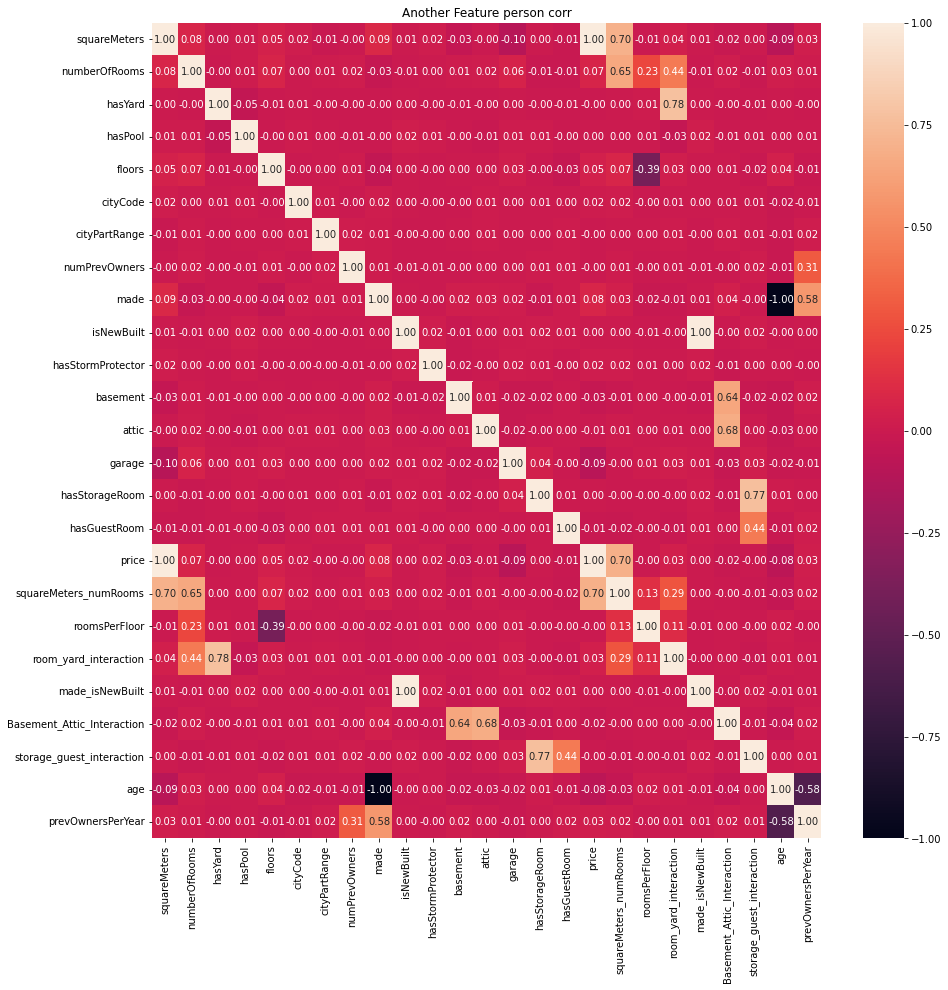

In [131]:
plt.figure(figsize=(15,15))
sns.heatmap(all_data.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("Another Feature person corr")
plt.show()

## 피쳐 제거(선택)

- 상관관계에서 가격 예측 시 필요한 특성만 사용하도록 하자

In [132]:
# 앞 선 EDA를 통해서 성능을 올리기 위해서 상관관계에서 price 예측과 연관 없는 특성 선택
feats_drop = ['cityCode','squareMeters_numRooms','roomsPerFloor','room_yard_interaction','made_isNewBuilt','Basement_Attic_Interaction','storage_guest_interaction','age','prevOwnersPerYear']
all_data = all_data.drop(feats_drop, axis=1)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47882 entries, 0 to 47881
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       47882 non-null  float64
 1   numberOfRooms      47882 non-null  int64  
 2   hasYard            47882 non-null  int64  
 3   hasPool            47882 non-null  int64  
 4   floors             47882 non-null  int64  
 5   cityPartRange      47882 non-null  int64  
 6   numPrevOwners      47882 non-null  int64  
 7   made               47882 non-null  int64  
 8   isNewBuilt         47882 non-null  int64  
 9   hasStormProtector  47882 non-null  int64  
 10  basement           47882 non-null  int64  
 11  attic              47882 non-null  int64  
 12  garage             47882 non-null  int64  
 13  hasStorageRoom     47882 non-null  int64  
 14  hasGuestRoom       47882 non-null  int64  
 15  price              32728 non-null  float64
dtypes: float64(2), int64(1

## 데이터 나누기

In [133]:
# 정답의 결측 여부로 해결
X_sub = all_data[pd.isnull(all_data['price'])] # submisson용

# 훈련용
X = all_data[~pd.isnull(all_data['price'])] 
print(X.shape, X_sub.shape)
X.head() # Price 제거 필요

(32728, 16) (15154, 16)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523.0,3,0,1,63,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771.0,39,1,1,98,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712.0,58,0,1,19,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316.0,47,0,0,6,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429.0,19,1,1,90,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [134]:
y = X['price']
X = X.drop( ['price'], axis=1 )
X_sub = X_sub.drop( ['price'], axis=1 )

In [135]:
print(X.shape, X_sub.shape, y.shape)

(32728, 15) (15154, 15) (32728,)


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22909, 15), (9819, 15), (22909,), (9819,))

# 베이스 모델 학습 및 평가

In [137]:
from sklearn.linear_model import LinearRegression

# 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

# 모델 예측
y_pred = lr_model.predict(X_test)
y_pred.shape

(9819,)

In [138]:
# 모델 평가 함수

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def show_reg_metric(true, preds):
  mae   = mean_absolute_error(true, preds)
  mse   = mean_squared_error(true, preds)
  rmse  = np.sqrt( mse )
  msle  = mean_squared_log_error(true, preds)
  rmsle = np.sqrt( msle )
  r2    = r2_score(true, preds)
  print('-'*30)
  print(f'mae \t {mae:.3f}' )
  print(f'mse \t {mse:.3f}' )
  print(f'rmse \t {rmse:.3f}' )
  print(f'msle \t {msle:.3f}' )
  print(f'rmsle \t {rmsle:.3f}' )
  print(f'r2 \t {r2:.3f}' )
  print('-'*30)

show_reg_metric(y_test, y_pred)

------------------------------
mae 	 8944.393
mse 	 29775992510.710
rmse 	 172557.215
msle 	 0.006
rmsle 	 0.076
r2 	 0.997
------------------------------


In [139]:
# 테스트 데이터로 예측
sub_y_pred = lr_model.predict(X_sub) 

submission['price'] = sub_y_pred
submission.to_csv('submission.csv', index=False) # 파일로 저장

# 현재기준 ( 2/9 ) 100위권 이내 들어감

# 모델 선정 및 비교

In [140]:
from tqdm import tqdm
from sklearn.model_selection import TimeSeriesSplit

def RMSE(y, y_pred):
    rmse =  np.sqrt(mean_squared_error(y, y_pred))
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(X_train), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train1, X_test1 = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train1, y_test1 = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = model.fit(X_train1, y_train1)
        pred = clf.predict(X_test1)
        rmse = RMSE(y_test1, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSE: {r:.4f}')
    print(f'\n{model_name} mean RMSE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elstic = ElasticNet()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
#ada = AdaBoostRegressor() 
xgb = XGBRegressor()
lgbm = LGBMRegressor()

In [142]:
models = []
scores = []
for model in [lr, ridge, lasso, elstic, dt, rf, gb, xgb, lgbm]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 40.65it/s]


1 FOLDS: LinearRegression RMSE: 12365.0705
2 FOLDS: LinearRegression RMSE: 6439.2816
3 FOLDS: LinearRegression RMSE: 234697.5375
4 FOLDS: LinearRegression RMSE: 254511.6276
5 FOLDS: LinearRegression RMSE: 43089.2319
6 FOLDS: LinearRegression RMSE: 135113.9305
7 FOLDS: LinearRegression RMSE: 69218.5865
8 FOLDS: LinearRegression RMSE: 17385.6368
9 FOLDS: LinearRegression RMSE: 54528.7666
10 FOLDS: LinearRegression RMSE: 231392.7455

LinearRegression mean RMSE: 105874.2415


Ridge Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 46.93it/s]


1 FOLDS: Ridge RMSE: 12351.5683
2 FOLDS: Ridge RMSE: 6436.1029
3 FOLDS: Ridge RMSE: 234697.5108
4 FOLDS: Ridge RMSE: 254511.5246
5 FOLDS: Ridge RMSE: 43089.1633
6 FOLDS: Ridge RMSE: 135113.8976
7 FOLDS: Ridge RMSE: 69218.5794
8 FOLDS: Ridge RMSE: 17385.5706
9 FOLDS: Ridge RMSE: 54528.7382
10 FOLDS: Ridge RMSE: 231392.7422

Ridge mean RMSE: 105872.5398


Lasso Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 35.66it/s]


1 FOLDS: Lasso RMSE: 12361.7324
2 FOLDS: Lasso RMSE: 6436.4185
3 FOLDS: Lasso RMSE: 234697.4820
4 FOLDS: Lasso RMSE: 254511.4350
5 FOLDS: Lasso RMSE: 43089.0096
6 FOLDS: Lasso RMSE: 135113.8715
7 FOLDS: Lasso RMSE: 69218.5604
8 FOLDS: Lasso RMSE: 17385.1896
9 FOLDS: Lasso RMSE: 54528.5170
10 FOLDS: Lasso RMSE: 231392.7333

Lasso mean RMSE: 105873.4949


ElasticNet Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 40.28it/s]


1 FOLDS: ElasticNet RMSE: 8888.5312
2 FOLDS: ElasticNet RMSE: 4981.7877
3 FOLDS: ElasticNet RMSE: 234684.5947
4 FOLDS: ElasticNet RMSE: 254394.7757
5 FOLDS: ElasticNet RMSE: 43026.4201
6 FOLDS: ElasticNet RMSE: 135059.3340
7 FOLDS: ElasticNet RMSE: 69223.2798
8 FOLDS: ElasticNet RMSE: 17284.4216
9 FOLDS: ElasticNet RMSE: 54461.4458
10 FOLDS: ElasticNet RMSE: 231386.5201

ElasticNet mean RMSE: 105339.1111


DecisionTreeRegressor Cross Validations...: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


1 FOLDS: DecisionTreeRegressor RMSE: 251033.2051
2 FOLDS: DecisionTreeRegressor RMSE: 6088.7568
3 FOLDS: DecisionTreeRegressor RMSE: 234973.5152
4 FOLDS: DecisionTreeRegressor RMSE: 303973.0728
5 FOLDS: DecisionTreeRegressor RMSE: 352088.6936
6 FOLDS: DecisionTreeRegressor RMSE: 324057.1019
7 FOLDS: DecisionTreeRegressor RMSE: 69283.9712
8 FOLDS: DecisionTreeRegressor RMSE: 16869.4608
9 FOLDS: DecisionTreeRegressor RMSE: 193151.9645
10 FOLDS: DecisionTreeRegressor RMSE: 209696.2767

DecisionTreeRegressor mean RMSE: 196121.6019


RandomForestRegressor Cross Validations...:  90%|█████████ | 9/10 [01:10<00:07,  7.85s/it]


KeyboardInterrupt: ignored

In [ ]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.title('RMSE', fontsize=15)
plt.show()

## 하이퍼 파라미터 튜닝 - 베이지안최적화

- Discussions 이나 bestScore 확인 시, XGBRegressor 사용 시 가장 성능이 좋게 나오는 것을 알 수 있다
- [공식문서](https://xgboost.readthedocs.io/en/stable/parameter.html)
- [XGBoost 개념 이해](https://wooono.tistory.com/97)
- [XGBoost 주요 파라미터](https://zzinnam.tistory.com/entry/XGboost-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC)
- [XGBoost와 LightGBM 하이퍼파라미터 튜닝 가이드](https://psystat.tistory.com/131)

In [ ]:
param_bound = {
    # 0.001 ~ 100 사이가 탐색 범위
    'n_estimators':(10, 1000),
    'min_samples_split':(2,5),    
    'min_samples_leaf':(2,5),
    'max_depth':(2,10),
    'max_leaf_nodes':(2,100),
    # 그리드라면 : 'n_estimators':[1, 10, 100, 200, 300, 400] => 5개중 하나, 램덤서치라면 : 1 ~ 400 중에 랜덤
}
# 파라미터를 튜닝할 하이퍼로 두고 생성
def my_RF_func (n_estimators,min_samples_split,min_samples_leaf,max_depth,max_leaf_nodes):
  # 정수는 사용하는 값들은 정수 변환을 해준다 -> 부동소수로 값이 오기 때문에
  model = XGBRegressor(n_estimators=int(n_estimators),
                                 min_samples_split=int(min_samples_split),
                                 min_samples_leaf=int(min_samples_leaf),
                                 max_depth=int(max_depth),
                                 max_leaf_nodes=int(max_leaf_nodes)  )
  # 학습
  model.fit(X_train, y_train)
  # 예측
  y_pred = model.predict( X_test )
  # 성능평가  
  accuracy_score( y_test, y_pred )
  # 예측 후 평가까지 진행
  return model.score( X_test, y_test )

optimizer = BayesianOptimization(f=my_RF_func, pbounds=param_bound, random_state=0)

In [ ]:
# 베이지안 최적화 수행 
'''
  # 메소드를 이용해 최대화 과정 수행
  # init_points :  초기 Random Search 갯수
  # n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
  # acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
  # xi : exploration 강도 (기본값은 0.0)
'''
optimizer.maximize(init_points=10, n_iter=100, acq='ei', xi=0.01)

In [ ]:
print( optimizer.max )
# 0.972027972027972 => 0.9790209790209791 : 0.006993006993007089 상승

In [ ]:
print('study.best_params:', studyXGB.best_trial.value)
print('Number of finished trials:', len(studyXGB.trials))
print('Best trial:', studyXGB.best_trial.params)

In [ ]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(studyXGB)

In [ ]:
# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(studyXGB)

In [ ]:
X.shape, y.shape, X_sub.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

## 최종 제출 

In [ ]:
# 테스트 데이터로 예측
final_xgb_model = XGBRegressor(**studyXGB.best_params)
final_xgb_model.fit(X, y)
sub_xgb_pred = final_xgb_model.predict(X_sub)

submission['price'] = sub_xgb_pred
submission.to_csv('submission_final.csv', index=False) # 파일로 저장

# 참고 문헌

[캘리포니아 집값 예측](https://didalsgur.tistory.com/entry/%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1-Dataset-California-Housing-Prices-Kaggle)

[핸드온 머신러닝](https://data-analysis-expertise.tistory.com/112)

[Boston 예측](https://velog.io/@wltn39/보스턴-주택가격-예측)

[AUTOKHAJI- 집값 예측 Stage1 : 데이터 전처리](https://dacon.io/codeshare/7477?dtype=recent)

[일반화선형회귀 : boston housing 집값 예측하기](http://docs.iris.tools/manual/IRIS-Usecase/ml/ML_boston_housing.html)

[LightGBM + Optuna로 top 10안에 들어봅시다.](https://dacon.io/en/codeshare/2876)

[Private_3위 Xgboost + Optuna](https://dacon.io/en/competitions/official/235986/codeshare/6991)